In [1]:
import pandas as pd
import os
import numpy as np

#ref: https://fairyonice.github.io/Welcome-to-CelebA.html
def get_annotation(fnmtxt, verbose=True):
    if verbose:
        print("_"*70)
        print(fnmtxt)
    
    rfile = open( fnmtxt , 'r' ) 
    texts = rfile.read().split("\n") 
    rfile.close()

    columns = np.array(texts[1].split(" "))
    columns = columns[columns != ""]
    df = []
    for txt in texts[2:]:
        txt = np.array(txt.split(" "))
        txt = txt[txt!= ""]
    
        df.append(txt)
        
    df = pd.DataFrame(df)

    if df.shape[1] == len(columns) + 1:
        columns = ["filepath"]+ list(columns)
    df.columns = columns   
    df = df.dropna()
    if verbose:
        print(" Total number of annotations {}\n".format(df.shape))
        print(df.head())
    ## cast to integer
    for nm in df.columns:
        if nm != "filepath":
            df[nm] = pd.to_numeric(df[nm],downcast="integer")
    return(df)


In [2]:
df = pd.read_csv("list_eval_partition.txt", sep=" ", header=None).rename(columns={0: "filepath", 1:"type"})
df

,filepath,type
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0
...,...,...
202594,202595.jpg,2
202595,202596.jpg,2
202596,202597.jpg,2
202597,202598.jpg,2


In [3]:
train_len = len(df[df["type"] == 0])
val_len = len(df[df["type"] == 1])
test_len = len(df[df["type"] == 2])

print("train: ", train_len, "val: ", val_len, "test: ", test_len)
print("Total:", len(df))

train:  162770 val:  19867 test:  19962
Total: 202599


In [4]:
attr_df = get_annotation("Anno/list_attr_celeba.txt", verbose=False)
attr_df

,filepath,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1


In [5]:
data_df = pd.concat([df.set_index('filepath'), attr_df.set_index('filepath')], axis=1, join="inner")
data_df

,type,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
filepath,,,,,,,,,,,,,,,,,,,,,
000001.jpg,0,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,0,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,0,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,0,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,0,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202595.jpg,2,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202596.jpg,2,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202597.jpg,2,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1


In [6]:
# data_df[data_df["5_o_Clock_Shadow"] == -1]
for c in data_df.columns:
    data_df.loc[data_df[c] == -1, c] = 0
#     data_df[data_df[c] == -1] = 0
data_df

,type,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
filepath,,,,,,,,,,,,,,,,,,,,,
000001.jpg,0,0,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
000002.jpg,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
000003.jpg,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
000004.jpg,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
000005.jpg,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202595.jpg,2,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
202596.jpg,2,0,0,0,0,0,1,1,0,0,...,0,1,1,0,0,0,0,0,0,1
202597.jpg,2,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [8]:
train_df = data_df[data_df["type"] == 0].drop(columns=["type"])
eval_df = data_df[data_df["type"] == 1].drop(columns=["type"])
test_df = data_df[data_df["type"] == 2].drop(columns=["type"])

In [9]:
# save to file
train_df.to_csv("train_40_att_list.txt", sep=" ", header=False)
eval_df.to_csv("val_40_att_list.txt", sep=" ", header=False)
test_df.to_csv("test_40_att_list.txt", sep=" ", header=False)

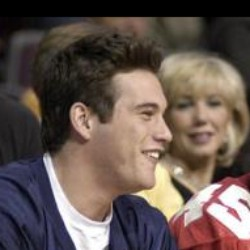

YES:  ['Blurry', 'Male', 'Mouth_Slightly_Open', 'No_Beard', 'Young']
NO:  ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Mustache', 'Narrow_Eyes', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie']


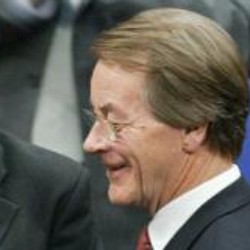

YES:  ['Blurry', 'Male', 'No_Beard']
NO:  ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']


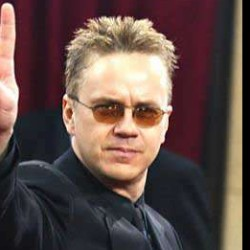

YES:  ['Eyeglasses', 'Male', 'No_Beard']
NO:  ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']


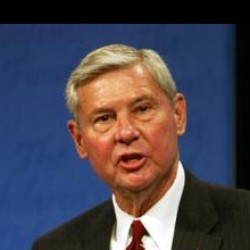

YES:  ['Male', 'No_Beard']
NO:  ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']


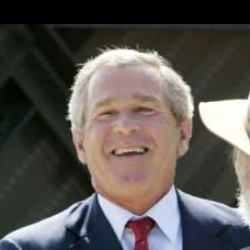

YES:  ['Blurry', 'Gray_Hair', 'Male', 'Mouth_Slightly_Open', 'Narrow_Eyes', 'No_Beard', 'Smiling', 'Wearing_Necktie']
NO:  ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Heavy_Makeup', 'High_Cheekbones', 'Mustache', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Young']


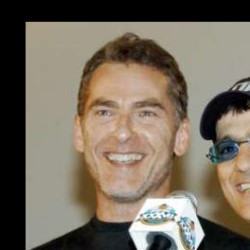

YES:  ['Blurry', 'Male', 'Mouth_Slightly_Open', 'No_Beard', 'Smiling', 'Young']
NO:  ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Mustache', 'Narrow_Eyes', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie']


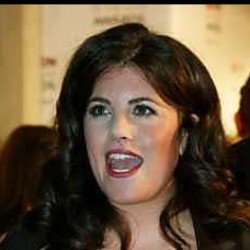

YES:  ['Heavy_Makeup', 'No_Beard', 'Wavy_Hair', 'Wearing_Lipstick', 'Young']
NO:  ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Necklace', 'Wearing_Necktie']


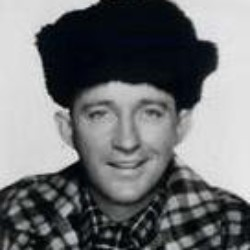

YES:  ['Blurry', 'Male', 'Wearing_Hat']
NO:  ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']


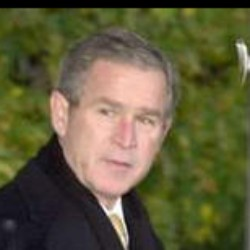

YES:  ['Blurry', 'Male', 'No_Beard']
NO:  ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']


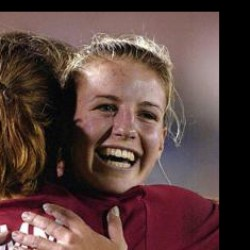

YES:  ['Mouth_Slightly_Open', 'No_Beard', 'Young']
NO:  ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mustache', 'Narrow_Eyes', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie']


In [1]:
# check result

from IPython.display import Image, display
import pandas as pd 

attrs = ["5_o_Clock_Shadow", "Arched_Eyebrows", "Attractive", "Bags_Under_Eyes", "Bald", 
         "Bangs", "Big_Lips", "Big_Nose", "Black_Hair", "Blond_Hair", 
         "Blurry", "Brown_Hair", "Bushy_Eyebrows", "Chubby", "Double_Chin", 
         "Eyeglasses", "Goatee", "Gray_Hair", "Heavy_Makeup", "High_Cheekbones", 
         "Male", "Mouth_Slightly_Open", "Mustache", "Narrow_Eyes", "No_Beard", 
         "Oval_Face", "Pale_Skin", "Pointy_Nose", "Receding_Hairline", "Rosy_Cheeks", 
         "Sideburns", "Smiling", "Straight_Hair", "Wavy_Hair", "Wearing_Earrings", 
         "Wearing_Hat", "Wearing_Lipstick", "Wearing_Necklace", "Wearing_Necktie", "Young"] 

# print("len of attrs: ", len(attrs))

col_dict = {0: "filename"}
for i, a in enumerate(attrs):
    col_dict[i+1] = a
    
preds = pd.read_csv("predictions.txt", sep=" ", header=None).rename(columns=col_dict)

samples = preds.sample(10)

for index, r in samples.iterrows():
    display(Image(filename="/home/MSAI/ch0001ka/advcv/testset/" + r["filename"]))
    
    yes_list = []
    no_list = []
    for k, v in dict(r).items():
        if v == 1:
            yes_list.append(k)
        elif v == -1:
            no_list.append(k)
            
    print("YES: ", yes_list)
    print("NO: ", no_list)

